# NY Taxi Data

* Examine data
* Load data from a CSV files
* Work with categorical data
* Work with data: Hourly trip
* Work with data: Rides per hour
* Work with data: Weather data

# Examine Data **

In [1]:
from os import path
import bz2
import pandas as pd

In [2]:
fname = 'taxi.csv.bz2'

In [3]:
path.getsize(fname) / (1<<20)

2.7408742904663086

In [4]:
with bz2.open(fname) as fp:
    print(sum(1 for line in fp))

100001


In [5]:
with bz2.open(fname, 'rt') as fp:
    for lnum, line in enumerate(fp):
        print(line[:-1])
        if lnum > 4:
            break

VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type 
2,2015-03-04 15:39:16,2015-03-04 15:42:30,N,1,-73.992240905761719,40.690120697021484,-73.999664306640625,40.684993743896484,2,.71,4.5,0,0.5,0,0,,0.3,5.3,2,1,,
2,2015-03-22 17:36:49,2015-03-22 17:45:39,N,5,-73.930038452148438,40.819576263427734,-73.907173156738281,40.811305999755859,2,1.41,12,0,0,0,0,,0,12,2,2,,
2,2015-03-25 22:08:45,2015-03-25 22:53:29,N,1,-73.961082458496094,40.807022094726563,-73.984642028808594,40.66314697265625,1,14.36,45,0.5,0.5,9.26,0,,0.3,55.56,1,1,,
2,2015-03-16 13:45:20,2015-03-16 13:52:04,N,1,-73.913200378417969,40.777961730957031,-73.926994323730469,40.772743225097656,2,1.05,6.5,0,0.5,0,0,,0.3,7.3,2,1,,
2,2015-03-19 18:53:50,2015-03-19 18:59:04,N,1,-73.925888061523

# Load data from CSV files **

In [6]:
df = pd.read_csv(fname)

In [7]:
len(df)

100000

In [8]:
df.iloc[0]

VendorID                 2015-03-04 15:42:30
lpep_pickup_datetime                       N
Lpep_dropoff_datetime                      1
Store_and_fwd_flag                  -73.9922
RateCodeID                           40.6901
Pickup_longitude                    -73.9997
Pickup_latitude                       40.685
Dropoff_longitude                          2
Dropoff_latitude                        0.71
Passenger_count                          4.5
Trip_distance                              0
Fare_amount                              0.5
Extra                                      0
MTA_tax                                    0
Tip_amount                               NaN
Tolls_amount                             0.3
Ehail_fee                                5.3
improvement_surcharge                      2
Total_amount                               1
Payment_type                             NaN
Trip_type                                NaN
Name: (2, 2015-03-04 15:39:16), dtype: object

In [9]:
with bz2.open(fname, 'rt') as fp:
    header = fp.readline()
    data = fp.readline()
    
print(header)
print(data)

VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type 

2,2015-03-04 15:39:16,2015-03-04 15:42:30,N,1,-73.992240905761719,40.690120697021484,-73.999664306640625,40.684993743896484,2,.71,4.5,0,0.5,0,0,,0.3,5.3,2,1,,



In [10]:
len(header.split(','))

21

In [11]:
len(data.split(','))

23

In [12]:
import numpy as np
df = pd.read_csv(fname, usecols=np.arange(21))  #usecols = use column = ใช้คอลัมน์อะไรบ้าง

In [13]:
df.iloc[0]

VendorID                                   2
lpep_pickup_datetime     2015-03-04 15:39:16
Lpep_dropoff_datetime    2015-03-04 15:42:30
Store_and_fwd_flag                         N
RateCodeID                                 1
Pickup_longitude                    -73.9922
Pickup_latitude                      40.6901
Dropoff_longitude                   -73.9997
Dropoff_latitude                      40.685
Passenger_count                            2
Trip_distance                           0.71
Fare_amount                              4.5
Extra                                      0
MTA_tax                                  0.5
Tip_amount                                 0
Tolls_amount                               0
Ehail_fee                                NaN
improvement_surcharge                    0.3
Total_amount                             5.3
Payment_type                               2
Trip_type                                  1
Name: 0, dtype: object

In [14]:
df.dtypes #เพื่อดูว่าแต่ละ column เก็บ data ที่มี type อะไรอยู่บ้าง

VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                  int64
dtype: object

In [15]:
df = pd.read_csv(fname, usecols=np.arange(21), parse_dates=['lpep_pickup_datetime', 'Lpep_dropoff_datetime'])

In [16]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                         int64
dtype: object

In [53]:
#df['VendorID']
df['lpep_pickup_datetime'].dt.hour  # ถ้า datatype เป็น datetime จะสามารถใช้ fn ที่เกี่ยวข้องกับ เวลาได้ อาทิ .week / .hour / ...

0        15
1        17
2        22
3        13
4        18
5         8
6        17
7        18
8        22
9         0
10       17
11       16
12       19
13       10
14        0
15        0
16       19
17       23
18       19
19        9
20       12
21       16
22        0
23       23
24       20
25        2
26        1
27       18
28        1
29       15
         ..
99970    17
99971    20
99972    18
99973    17
99974    19
99975    13
99976    22
99977    18
99978     1
99979    19
99980    13
99981    11
99982    13
99983    18
99984     1
99985    14
99986    20
99987    12
99988    12
99989    14
99990     8
99991    17
99992    14
99993    21
99994    14
99995    17
99996    19
99997    12
99998    19
99999     2
Name: lpep_pickup_datetime, Length: 100000, dtype: int64

# Work with categorical data **

In [18]:
df['VendorID'].unique()

array([2, 1])

In [55]:
df['Vendor'] = df['VendorID'].apply({1: 'Creative', 2: 'VeriFone'}.get) 
# ทุกๆค่าที่อยู่ใน column df['VendorID'] ถ้าค่าใด = 1 ให้แทนที่ด้วยค่า 'Creative' และ 2 แทนด้วย 'VeriFone'
df['Vendor'].head()

0    VeriFone
1    VeriFone
2    VeriFone
3    VeriFone
4    VeriFone
Name: Vendor, dtype: object

In [20]:
df['Vendor'].memory_usage() / (1<<20)

0.7630157470703125

In [57]:
df['Vendor'] = df['VendorID'].apply({1: 'Creative', 2: 'VeriFone'}.get).astype('category')
#เป็นการเปลี่ยน type จากฝั่งทางซ้านเป็นทางขวา

In [22]:
df['Vendor'].memory_usage() / (1<<20)

0.0955352783203125

In [23]:
df['Vendor'].head().cat.codes #.cat = category

0    1
1    1
2    1
3    1
4    1
dtype: int8

In [24]:
len(df[df['Vendor'] == 'VeriFone'])

77946

# Work with data: hourly trip rides **

In [25]:
df['lpep_pickup_datetime'].head().dt.round('H')

0   2015-03-04 16:00:00
1   2015-03-22 18:00:00
2   2015-03-25 22:00:00
3   2015-03-16 14:00:00
4   2015-03-19 19:00:00
Name: lpep_pickup_datetime, dtype: datetime64[ns]

In [26]:
keys = df['lpep_pickup_datetime'].dt.round('H')
df.groupby(keys)

In [27]:
df.groupby(keys).count().head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,Vendor
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2015-03-01 00:00:00,153,153,153,153,153,153,153,153,153,153,...,153,153,153,153,0,153,153,153,153,153
2015-03-01 01:00:00,266,266,266,266,266,266,266,266,266,266,...,266,266,266,266,0,266,266,266,266,266
2015-03-01 02:00:00,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,0,241,241,241,241,241
2015-03-01 03:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,0,180,180,180,180,180
2015-03-01 04:00:00,172,172,172,172,172,172,172,172,172,172,...,172,172,172,172,0,172,172,172,172,172


In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)    # ขนาดของ graph
#plt.figure(figsize=(12,8))   #เหมือนกันกับด้านบน

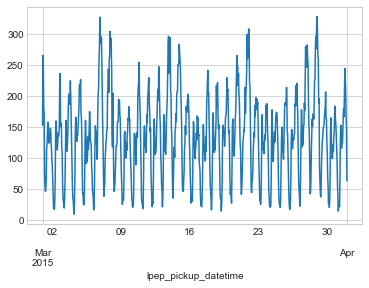

In [29]:
df.groupby(keys).count()['Vendor'].plot()

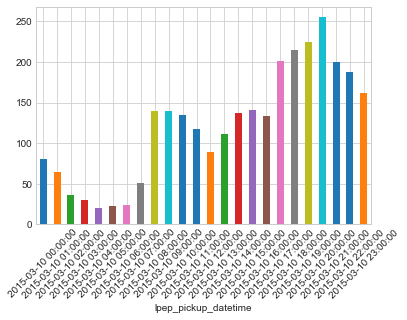

In [30]:
df.groupby(keys).count()['Vendor'].loc['2015-03-10'].plot.bar(rot=45)  # rot=45 คือ rotation 45 degree
#อยากได้ข้อมูลจาก column ['Vendor'] จากเฉพาะแถว ['2015-03-10'] เท่านั้น

# Work with data: rides per hour **

In [31]:
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df['day'] = df['lpep_pickup_datetime'].dt.date

In [32]:
df[['hour', 'day']].head()

,hour,day
0,15,2015-03-04
1,17,2015-03-22
2,22,2015-03-25
3,13,2015-03-16
4,18,2015-03-19


In [33]:
df.groupby(['Vendor', 'day', 'hour']).count().head()

VendorID  lpep_pickup_datetime  \
Vendor   day        hour                                   
Creative 2015-03-01 0         60.0                  60.0   
                    1         60.0                  60.0   
                    2         51.0                  51.0   
                    3         41.0                  41.0   
                    4         28.0                  28.0   

                          Lpep_dropoff_datetime  Store_and_fwd_flag  \
Vendor   day        hour                                              
Creative 2015-03-01 0                      60.0                60.0   
                    1                      60.0                60.0   
                    2                      51.0                51.0   
                    3                      41.0                41.0   
                    4                      28.0                28.0   

                          RateCodeID  Pickup_longitude  Pickup_latitude  \
Vendor   day        hour                                                  
Creative 2015-03-01 0           60.0              60.0             60.0   
                    1           60.0              60.0             60.0   
                    2           51.0              51.0             51.0   
                    3           41.0              41.0             41.0   
                    4           28.0              28.0             28.0   

                          Dropoff_longitude  Dropoff_latitude  \
Vendor   day        hour                                        
Creative 2015-03-01 0                  60.0              60.0   
                    1                  60.0              60.0   
                    2                  51.0              51.0   
                    3                  41.0              41.0   
                    4                  28.0              28.0   

                          Passenger_count     ...      Fare_amount  Extra  \
Vendor   day        hour                      ...                           
Creative 2015-03-01 0                60.0     ...             60.0   60.0   
                    1                60.0     ...             60.0   60.0   
                    2                51.0     ...             51.0   51.0   
                    3                41.0     ...             41.0   41.0   
                    4                28.0     ...             28.0   28.0   

                          MTA_tax  Tip_amount  Tolls_amount  Ehail_fee  \
Vendor   day        hour                                                 
Creative 2015-03-01 0        60.0        60.0          60.0        0.0   
                    1        60.0        60.0          60.0        0.0   
                    2        51.0        51.0          51.0        0.0   
                    3        41.0        41.0          41.0        0.0   
                    4        28.0        28.0          28.0        0.0   

                          improvement_surcharge  Total_amount  Payment_type  \
Vendor   day        hour                                                      
Creative 2015-03-01 0                      60.0          60.0          60.0   
                    1                      60.0          60.0          60.0   
                    2                      51.0          51.0          51.0   
                    3                      41.0          41.0          41.0   
                    4                      28.0          28.0          28.0   

                          Trip_type   
Vendor   day        hour              
Creative 2015-03-01 0           60.0  
                    1           60.0  
                    2           51.0  
                    3           41.0  
                    4           28.0  

[5 rows x 21 columns]

In [34]:
ddf = df.groupby(['Vendor', 'day', 'hour'], as_index=False).count()
ddf.head()

,Vendor,day,hour,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,Creative,2015-03-01,0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,...,60.0,60.0,60.0,60.0,60.0,0.0,60.0,60.0,60.0,60.0
1,Creative,2015-03-01,1,60.0,60.0,60.0,60.0,60.0,60.0,60.0,...,60.0,60.0,60.0,60.0,60.0,0.0,60.0,60.0,60.0,60.0
2,Creative,2015-03-01,2,51.0,51.0,51.0,51.0,51.0,51.0,51.0,...,51.0,51.0,51.0,51.0,51.0,0.0,51.0,51.0,51.0,51.0
3,Creative,2015-03-01,3,41.0,41.0,41.0,41.0,41.0,41.0,41.0,...,41.0,41.0,41.0,41.0,41.0,0.0,41.0,41.0,41.0,41.0
4,Creative,2015-03-01,4,28.0,28.0,28.0,28.0,28.0,28.0,28.0,...,28.0,28.0,28.0,28.0,28.0,0.0,28.0,28.0,28.0,28.0


In [35]:
hdf = ddf.groupby(['Vendor', 'hour'], as_index=False).median()
hdf.head()

,Vendor,hour,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,Creative,0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,...,23.0,23.0,23.0,23.0,23.0,0.0,23.0,23.0,23.0,23.0
1,Creative,1,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,...,18.0,18.0,18.0,18.0,18.0,0.0,18.0,18.0,18.0,18.0
2,Creative,2,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,...,11.5,11.5,11.5,11.5,11.5,0.0,11.5,11.5,11.5,11.5
3,Creative,3,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,8.0,8.0,0.0,8.0,8.0,8.0,8.0
4,Creative,4,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,...,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0


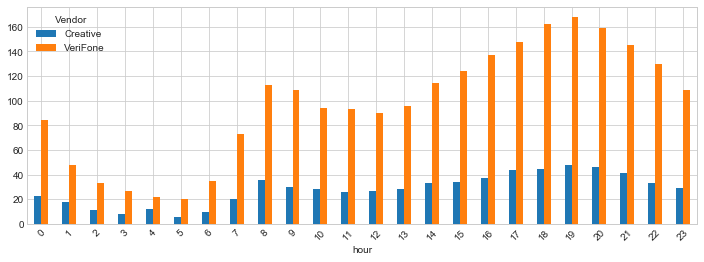

In [64]:
vdf = hdf.pivot(columns='Vendor', index='hour', values='Extra')
#vdf.plot.bar(rot=45)
vdf.plot.bar(figsize=(12,4) ,rot=45)
#Legend
#Axis
#Title

# Work with data: weather data **

In [65]:
import sqlite3
conn = sqlite3.connect('weather.db')

In [66]:
wdf = pd.read_sql('SELECT * FROM weather', conn)
wdf.columns

Index(['STATION', 'DATE', 'PRCP', 'SNOW', 'TMAX', 'TMIN'], dtype='object')

In [68]:
wdf = pd.read_sql('SELECT * FROM weather', conn, parse_dates=['DATE'], index_col='DATE')
wdf.dtypes

STATION     object
PRCP       float64
SNOW       float64
TMAX         int64
TMIN         int64
dtype: object

In [69]:
wdf.index

DatetimeIndex(['2015-03-01', '2015-03-02', '2015-03-03', '2015-03-04',
               '2015-03-05', '2015-03-06', '2015-03-07', '2015-03-08',
               '2015-03-09', '2015-03-10',
               ...
               '2016-03-23', '2016-03-24', '2016-03-25', '2016-03-26',
               '2016-03-27', '2016-03-28', '2016-03-29', '2016-03-30',
               '2016-03-31', '2016-04-01'],
              dtype='datetime64[ns]', name='DATE', length=398, freq=None)

In [70]:
wdf.describe()

,PRCP,SNOW,TMAX,TMIN
count,398.000000,398.000000,398.000000,398.000000
mean,0.109799,0.129146,65.017588,50.035176
std,0.310245,1.463461,17.556593,16.336782
min,0.000000,0.000000,15.000000,-1.000000
25%,0.000000,0.000000,52.000000,38.000000
50%,0.000000,0.000000,65.000000,50.000000
75%,0.020000,0.000000,81.750000,65.000000
max,2.310000,27.300000,97.000000,82.000000


In [42]:
from scipy.constants import convert_temperature
wdf['tempF'] = convert_temperature(wdf['TMAX']/10, 'C', 'F')
wdf.head()

,STATION,PRCP,SNOW,TMAX,TMIN,tempF
DATE,,,,,,
2015-03-01,GHCND:USW00094728,0.52,4.8,31,24,37.58
2015-03-02,GHCND:USW00094728,0.00,0.0,39,27,39.02
2015-03-03,GHCND:USW00094728,0.67,1.8,37,22,38.66
2015-03-04,GHCND:USW00094728,0.25,0.0,45,35,40.10
2015-03-05,GHCND:USW00094728,0.76,7.5,40,19,39.20


In [43]:
ddf = df.groupby(df['lpep_pickup_datetime'].dt.date).count()

In [44]:
jdf = ddf.join(wdf)
jdf.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Trip_type,Vendor,hour,day,STATION,PRCP,SNOW,TMAX,TMIN,tempF
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2015-03-01,3177,3177,3177,3177,3177,3177,3177,3177,3177,3177,...,3177,3177,3177,3177,GHCND:USW00094728,0.52,4.8,31,24,37.58
2015-03-02,2775,2775,2775,2775,2775,2775,2775,2775,2775,2775,...,2775,2775,2775,2775,GHCND:USW00094728,0.00,0.0,39,27,39.02
2015-03-03,2990,2990,2990,2990,2990,2990,2990,2990,2990,2990,...,2990,2990,2990,2990,GHCND:USW00094728,0.67,1.8,37,22,38.66
2015-03-04,3072,3072,3072,3072,3072,3072,3072,3072,3072,3072,...,3072,3072,3072,3072,GHCND:USW00094728,0.25,0.0,45,35,40.10
2015-03-05,2491,2491,2491,2491,2491,2491,2491,2491,2491,2491,...,2491,2491,2491,2491,GHCND:USW00094728,0.76,7.5,40,19,39.20


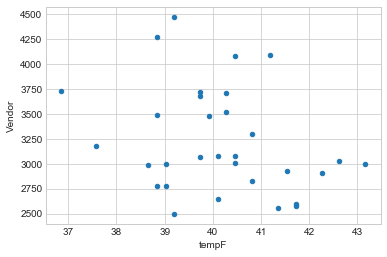

In [45]:
jdf.plot.scatter(x='tempF', y='Vendor')

Text(0, 0.5, 'Daily Rides')

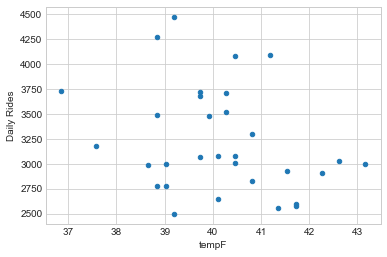

In [46]:
ax = jdf.plot.scatter(x='tempF', y='Vendor')
ax.set_ylabel('Daily Rides')